In [90]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
style = {'description_width': 'initial'}

In [163]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [164]:
# file_name = 
dataset = pd.read_csv('Data/Train.csv')
test_file= 'Data/Test.csv'
testdata = pd.read_csv(test_file)
x_test=testdata.values
sample_data = pd.read_excel("Data/Sample_Submission.xlsx")
df = dataset

In [165]:
x = dataset[[col for col in dataset.columns if col not in ('labels')]]
y = dataset['labels']

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate,KFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size=0.2, random_state = 0) 

In [77]:
y.value_counts()

0    29941
1     3967
Name: labels, dtype: int64

In [6]:
cr=dataset.corr()

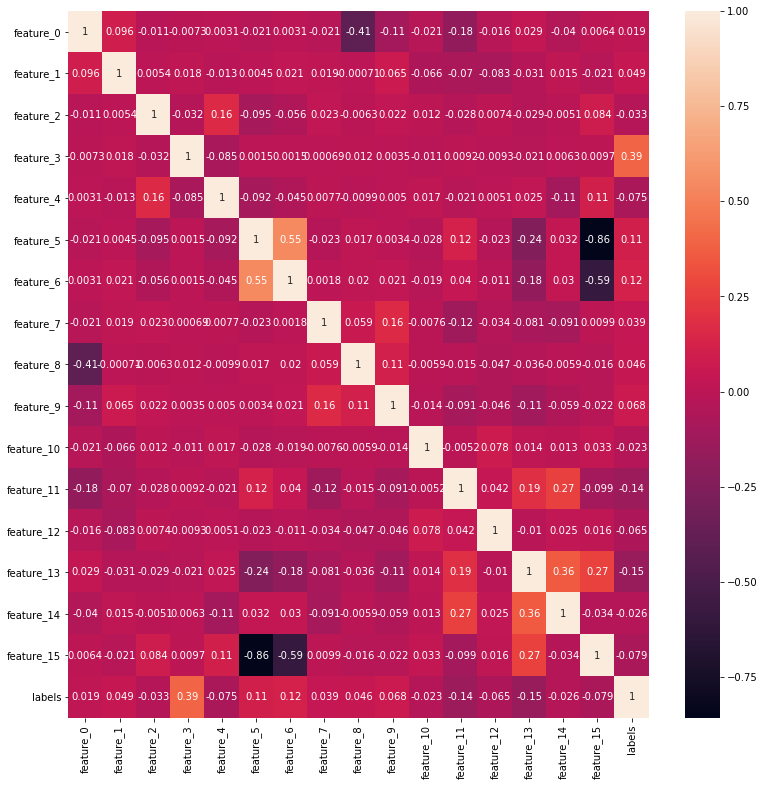

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
sns.heatmap(cr, annot=True)
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['NOT_PASS','PASS']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

In [9]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

In [10]:
def detail(model,y_pred):
    try:
        scores = model.decision_function(X_test)
    except:
        scores = model.predict_proba(X_test)[:,1]

    #Make plots
    plot_cm(model, y_pred)
    plot_aucprc(model, scores)

In [158]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def roc(y_test,y_pred):
    return roc_auc_score(y_test,y_pred)
def f1(y_test,y_Pred):
    return f1_score(y_test, y_Pred)

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',max_iter=4000,class_weight='balanced',
                       dual=True)
lr.fit(X_train, y_train)
y_Pred=lr.predict(X_test)

In [15]:
from imblearn.ensemble import BalancedRandomForestClassifier
# define model
model = BalancedRandomForestClassifier(max_samples=0.9,max_features="sqrt",
                                  criterion="entropy",class_weight="balanced_subsample",
                                  bootstrap=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

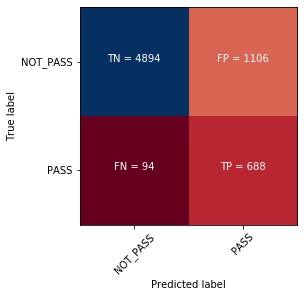

Recall=0.880 
Precision=0.384
F1=0.534
Average precision-recall score: 0.583


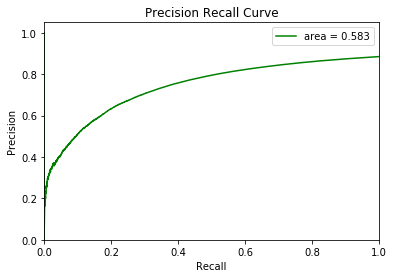

In [16]:
detail(model,y_pred)

In [17]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50,30),max_iter = 500, alpha=1e-4,activation='tanh',
                    solver='sgd', verbose=2, tol=1e-4, random_state=8,learning_rate="adaptive",
                    shuffle=False,learning_rate_init=.1)

y_pred = mlp.fit(X_train, y_train).predict(X_test)

Iteration 1, loss = 0.27882018
Iteration 2, loss = 0.24494531
Iteration 3, loss = 0.23918560
Iteration 4, loss = 0.23568510
Iteration 5, loss = 0.23299092
Iteration 6, loss = 0.23062843
Iteration 7, loss = 0.22847284
Iteration 8, loss = 0.22655873
Iteration 9, loss = 0.22491900
Iteration 10, loss = 0.22353242
Iteration 11, loss = 0.22237180
Iteration 12, loss = 0.22135054
Iteration 13, loss = 0.22037504
Iteration 14, loss = 0.21947398
Iteration 15, loss = 0.21864083
Iteration 16, loss = 0.21785716
Iteration 17, loss = 0.21709440
Iteration 18, loss = 0.21633923
Iteration 19, loss = 0.21555227
Iteration 20, loss = 0.21481343
Iteration 21, loss = 0.21404542
Iteration 22, loss = 0.21320609
Iteration 23, loss = 0.21231435
Iteration 24, loss = 0.21122381
Iteration 25, loss = 0.21006048
Iteration 26, loss = 0.20884021
Iteration 27, loss = 0.20769805
Iteration 28, loss = 0.20655108
Iteration 29, loss = 0.20544191
Iteration 30, loss = 0.20443545
Iteration 31, loss = 0.20353516
Iteration 32, los

Iteration 250, loss = 0.08241207
Iteration 251, loss = 0.08217162
Iteration 252, loss = 0.08196162
Iteration 253, loss = 0.08180002
Iteration 254, loss = 0.08166940
Iteration 255, loss = 0.08148489
Iteration 256, loss = 0.08142247
Iteration 257, loss = 0.08108908
Iteration 258, loss = 0.08150683
Iteration 259, loss = 0.08066560
Iteration 260, loss = 0.08150672
Iteration 261, loss = 0.08050667
Iteration 262, loss = 0.08123957
Iteration 263, loss = 0.08093118
Iteration 264, loss = 0.08135410
Iteration 265, loss = 0.08132251
Iteration 266, loss = 0.08191010
Iteration 267, loss = 0.08183001
Iteration 268, loss = 0.08194930
Iteration 269, loss = 0.08111028
Iteration 270, loss = 0.08052547
Iteration 271, loss = 0.08028166
Iteration 272, loss = 0.07990189
Iteration 273, loss = 0.07956054
Iteration 274, loss = 0.07950358
Iteration 275, loss = 0.07903418
Iteration 276, loss = 0.08002465
Iteration 277, loss = 0.08040959
Iteration 278, loss = 0.07900147
Iteration 279, loss = 0.07890225
Iteration 

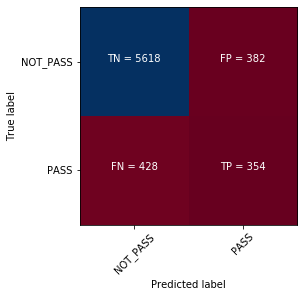

Recall=0.453 
Precision=0.481
F1=0.466
Average precision-recall score: 0.461


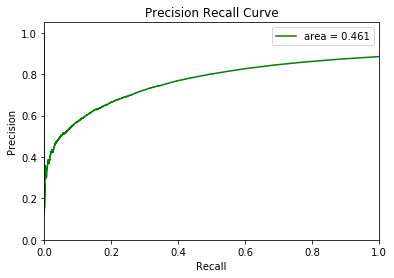

In [18]:
detail(mlp,y_pred)

In [ ]:
count_class_0, count_class_1 = y.value_counts()

# Divide by class
df_class_0 = dataset[dataset['labels'] == 0]
df_class_1 = dataset[dataset['labels'] == 1]

# Under sampling

Random under-sampling:
1    3967
0    3967
Name: labels, dtype: int64


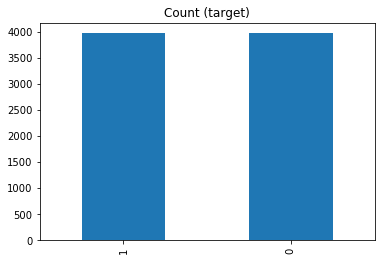

In [33]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.labels.value_counts())

df_test_under.labels.value_counts().plot(kind='bar', title='Count (target)');

# Over Sampling

Random over-sampling:
1    29941
0    29941
Name: labels, dtype: int64


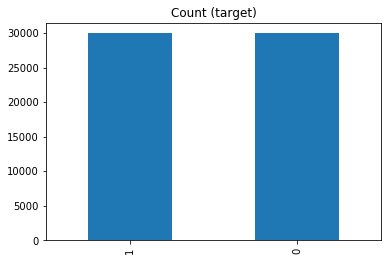

In [34]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.labels.value_counts())

df_test_over.labels.value_counts().plot(kind='bar', title='Count (target)');

In [43]:
# from sklearn.datasets import make_classification

# X, y = make_classification(
#     n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
#     n_informative=3, n_redundant=1, flip_y=0,
#     n_features=20, n_clusters_per_class=1,
#     n_samples=100, random_state=10
# )

In [47]:
# X = pd.DataFrame(X)
# y = pd.DataFrame(y)

In [167]:
# df = x
# df['labels'] = y
# df.labels.value_counts().plot(kind='bar', title='Count (target)');
X=x

In [123]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [157]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=16)
# X = pca.fit_transform(X)

# plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

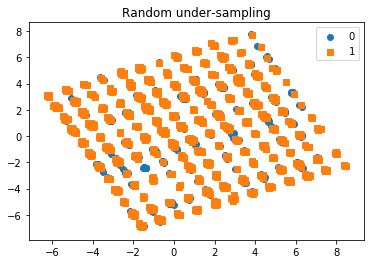

In [102]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

# print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

25974 new random picked points


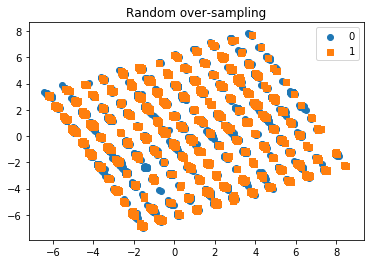

In [103]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

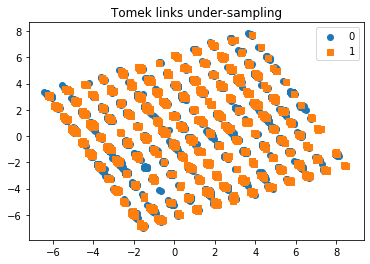

In [114]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(X, y)

# print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

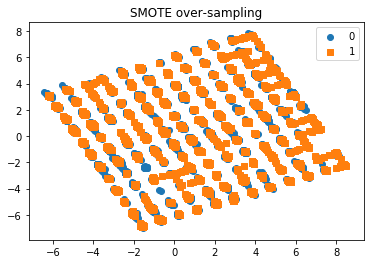

In [126]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

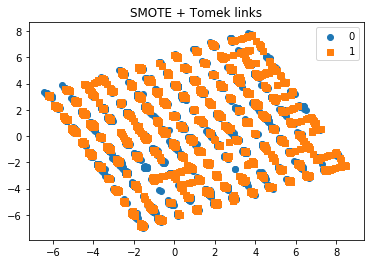

In [127]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')


In [128]:
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 

In [129]:
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6000
           1       0.60      0.21      0.32       782

    accuracy                           0.89      6782
   macro avg       0.75      0.60      0.63      6782
weighted avg       0.87      0.89      0.87      6782



In [130]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 3185
Before OverSampling, counts of label '0': 23941 

After OverSampling, the shape of train_X: (47882, 16)
After OverSampling, the shape of train_y: (47882,) 

After OverSampling, counts of label '1': 23941
After OverSampling, counts of label '0': 23941


In [131]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      6000
           1       0.34      0.75      0.47       782

    accuracy                           0.80      6782
   macro avg       0.65      0.78      0.67      6782
weighted avg       0.89      0.80      0.83      6782



In [132]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 


Before Undersampling, counts of label '1': 3185
Before Undersampling, counts of label '0': 23941 

After Undersampling, the shape of train_X: (6370, 16)
After Undersampling, the shape of train_y: (6370,) 

After Undersampling, counts of label '1': 3185
After Undersampling, counts of label '0': 3185


In [146]:
# train the model on train set 
lr2 = LogisticRegression(max_iter=1000) 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.70      0.81      6000
           1       0.24      0.73      0.36       782

    accuracy                           0.70      6782
   macro avg       0.60      0.71      0.58      6782
weighted avg       0.87      0.70      0.76      6782



In [148]:
from imblearn.ensemble import BalancedRandomForestClassifier
# define model
model = BalancedRandomForestClassifier(max_samples=0.9,max_features="sqrt",
                                  criterion="entropy",
                                  bootstrap=True)
model.fit(X_train_res, y_train_res.ravel())
predictions = model.predict(X_test)

In [149]:
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      6000
           1       0.50      0.69      0.58       782

    accuracy                           0.88      6782
   macro avg       0.73      0.80      0.75      6782
weighted avg       0.90      0.88      0.89      6782



In [151]:
from sklearn.ensemble import RandomForestClassifier
# define model
model = RandomForestClassifier(n_estimators=150)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [152]:
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6000
           1       0.66      0.41      0.50       782

    accuracy                           0.91      6782
   macro avg       0.79      0.69      0.73      6782
weighted avg       0.90      0.91      0.90      6782



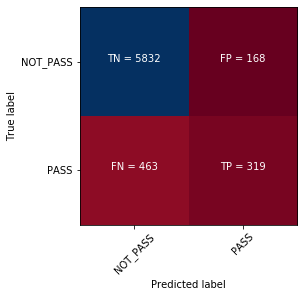

Recall=0.408 
Precision=0.655
F1=0.503
Average precision-recall score: 0.581


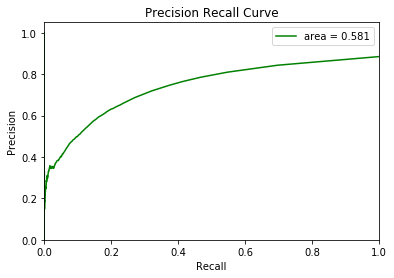

In [153]:
detail(model,predictions)

In [154]:
f1(y_test, predictions)

0.5027580772261623

In [159]:
accuracy_score(y_test, predictions)

0.9069595989383663

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [175]:
from sklearn.utils import resample
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.labels==0]
fraud = X[X.labels==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

NameError: name 'labels' is not defined

In [176]:
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.labels.value_counts()

1    22453
0    22453
Name: labels, dtype: int64

In [178]:
y_train = upsampled.labels
X_train = upsampled.drop('labels', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)


In [181]:
accuracy_score(y_test, upsampled_pred)

0.8066532971570131

In [182]:
f1_score(y_test, upsampled_pred)

0.4844290657439446

In [183]:
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.labels.value_counts()

1    2978
0    2978
Name: labels, dtype: int64

In [185]:
y_train = downsampled.labels
X_train = downsampled.drop('labels', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [186]:
f1_score(y_test, undersampled_pred)

0.48330683624801274

In [188]:

from imblearn.over_sampling import SMOTE

# Separate input features and target
y = dataset.labels
X = dataset.drop('labels', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [189]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

In [190]:
f1_score(y_test, smote_pred)

0.4868247694334651

## medium


In [195]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
y = dataset.labels
X = dataset.drop('labels', axis=1)
steps = [('over', RandomOverSampler()), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.904


In [192]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.787


In [ ]:
model.predict